In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Starter_Code/Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
inspector = inspect(engine)
#Get Column names for station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#Get Column names for measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

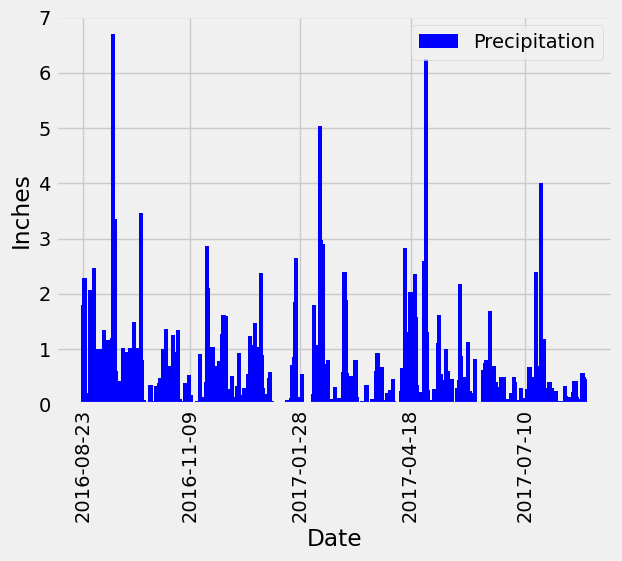

<Figure size 200000x100000 with 0 Axes>

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame.from_records(query
    , columns=['Date', 'Precipitation'])
precipitation_df_clean = precipitation_df.dropna(how='any',axis=0)
pd.to_datetime(precipitation_df_clean['Date'])

# Sort the dataframe by date
precipitation_df_clean=precipitation_df_clean.sort_values('Date', ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precipitation_df_clean['Date'], precipitation_df_clean['Precipitation'], align='center',color='blue', width=3, label="Precipitation")
plt.xticks(['2016-08-23','2016-11-09','2017-01-28','2017-04-18','2017-07-10'], rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend()
plt.figure(figsize=(2000,1000))
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df_clean.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

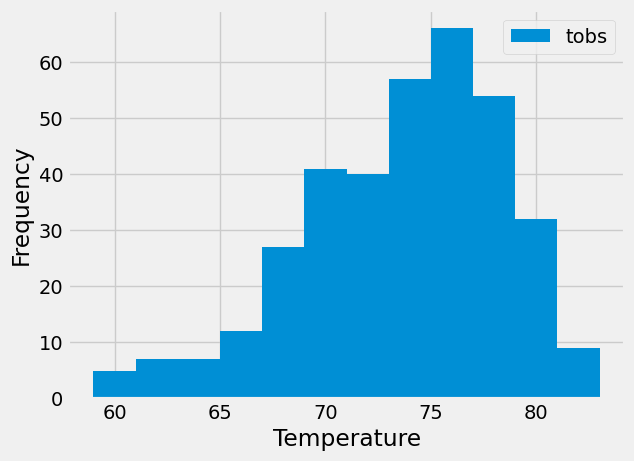

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Find the last date recorded for the location USC00519281
session.query(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station == 'USC00519281').first()
year_ago = dt.date(2017,8,18) - dt.timedelta(days=365)

#Query the last 12 months of recorded temperatures and count the number of occurences of each temperature
year_ago = dt.date(2017,8,18) - dt.timedelta(days=365)

#List of the count of the number of occurencse of each temperature
temp_count = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    group_by(Measurement.tobs).\
    order_by(Measurement.tobs.desc()).\
        filter(Measurement.station == 'USC00519281',Measurement.date >=year_ago).all()

#Created Dataframe of the list of temperatures to create histogram
temp = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281',Measurement.date >=year_ago).all()

temp_df = pd.DataFrame.from_records(temp
    , columns=['Tobs'])
temp_df
bins = 12

plt.hist(temp_df['Tobs'], bins=bins, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show




# Close Session

In [44]:
# Close Session
session.close()